# Prison Break Project - Helicopter Escapes

On multiple occassions, prisoners have tried to break out of prison with the aid of helicopters.
The aim of this project is to answer the following questions:
- In which year did the most attempts at breaking out of prison with a helicopter occur?
- In which countries did the most attempted helicopter prison escapes occur?
    
To answer these questions, I will be analyzing data scraped from [this](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia page. It covers the details of attempted helicopter prison escapes over a 50-year period (1971-2020)

### 1. Importing the necessary modules

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns

### 2. Loading the data  
The dataset is going to be in the form of a Pandas DataFrame.

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = pd.read_html(url)[1]

### 3. Exploring the dataset. 
The dataset contains six data fields: 
- The date of the attempted prison break 
- The name of the prison
- The country where it happened
- Whether the attempt was successful or not
- The names of the escapees
- More details

In [4]:
len(data)

48

In [5]:
data.head(2)

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."


In [6]:
data.tail(2)

,Date,Prison name,Country,Succeeded,Escapee(s),Details
46,"July 1, 2018","Réau, near Paris",France,Yes,Rédoine Faïd,Faïd was helped by several heavily armed men w...
47,"September 25, 2020","Forest prison, Brussels",Belgium,No,Kristel A.,Three armed men hijacked a Eurocopter AS355 he...


### 4. Data Cleaning 
Removing the last two columns, so that the data is more readable, and replacing the date with just the year, since that is all the analysis needs.

In [7]:
new_data = data.drop(["Details", "Escapee(s)"], axis = 1)
new_data[:2]

,Date,Prison name,Country,Succeeded
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes


In [8]:
new_data["Date"] = new_data["Date"].str[-4:]
new_data.rename(columns = {"Date": "Year"}, inplace = True)
new_data.head(2)

,Year,Prison name,Country,Succeeded
0,1971,Santa Martha Acatitla,Mexico,Yes
1,1973,Mountjoy Jail,Ireland,Yes


### 5. Computing and Visualizing the Number of Attempts Per Year

In [9]:
# Getting the range of the years
print("min", min(new_data["Year"]))
print("max", max(new_data["Year"]))

min 1971
max 2020


In [10]:
# Getting a pivot_table for the counts
year_counts = new_data.pivot_table(values = "Country", index = "Year", aggfunc = "count")
# Renaming the "counts" column 
year_counts.columns = ["Number of Attempts"]
# Simple sorting
year_counts.sort_index(ascending = True)

# Just checking
year_counts.head()
 

,Number of Attempts
Year,
1971,1
1973,1
1978,1
1981,2
1983,1


As can be seen above, some years are missing from the dataframe. That is because those years had zero attempts. Next, I will be adding those years to the dataframe, so that the visualization isn't misleading or confusing. 

In [11]:
for year_ in range(1971, 2021):
    year = str(year_)           # Because the Year column is string, not integer (for comparison)
    if year not in year_counts.index:    # If the year is missing from the pivot table
        year_counts.loc[year] = 0        
year_counts.sort_index(ascending = True, inplace = True)

len(year_counts) # This is for confirmation, the length should be 50 (for 50 years)

50

In [12]:
year_counts.tail()

,Number of Attempts
Year,
2016,1
2017,0
2018,1
2019,0
2020,1


In [18]:
def barplott(pivot_table_with_1_column):
    data = pivot_table_with_1_column
    ya = data.index
    d = {ya[n]:int(data.loc[ya[n]]) for n in range(0,len(data))}
    plt.figure(figsize=(9,15))

    axes = plt.axes()
    axes.get_xaxis().set_visible(False)

    spines = axes.spines
    spines['top'].set_visible(False)
    spines['right'].set_visible(False)
    spines['bottom'].set_visible(False)
    spines['left'].set_visible(False)
    ax = plt.barh(*zip(*d.items()), height=.5)
    plt.yticks(list(d.keys()), list(d.keys()))
    plt.xticks(range(4), range(4))
    rectangles = ax.patches
    for rectangle in rectangles:
        x_value = rectangle.get_width()
        y_value = rectangle.get_y() + rectangle.get_height() / 2
        space = 5
        ha = 'left'
        label = "{}".format(x_value)
        if x_value > 0:
            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha)

    axes.tick_params(tick1On=False)
    plt.title("Number of Attempted Helicopter Prison Breaks by Year")
    plt.show()
    barplott(year_counts)
    print(barplott(year_counts))
    

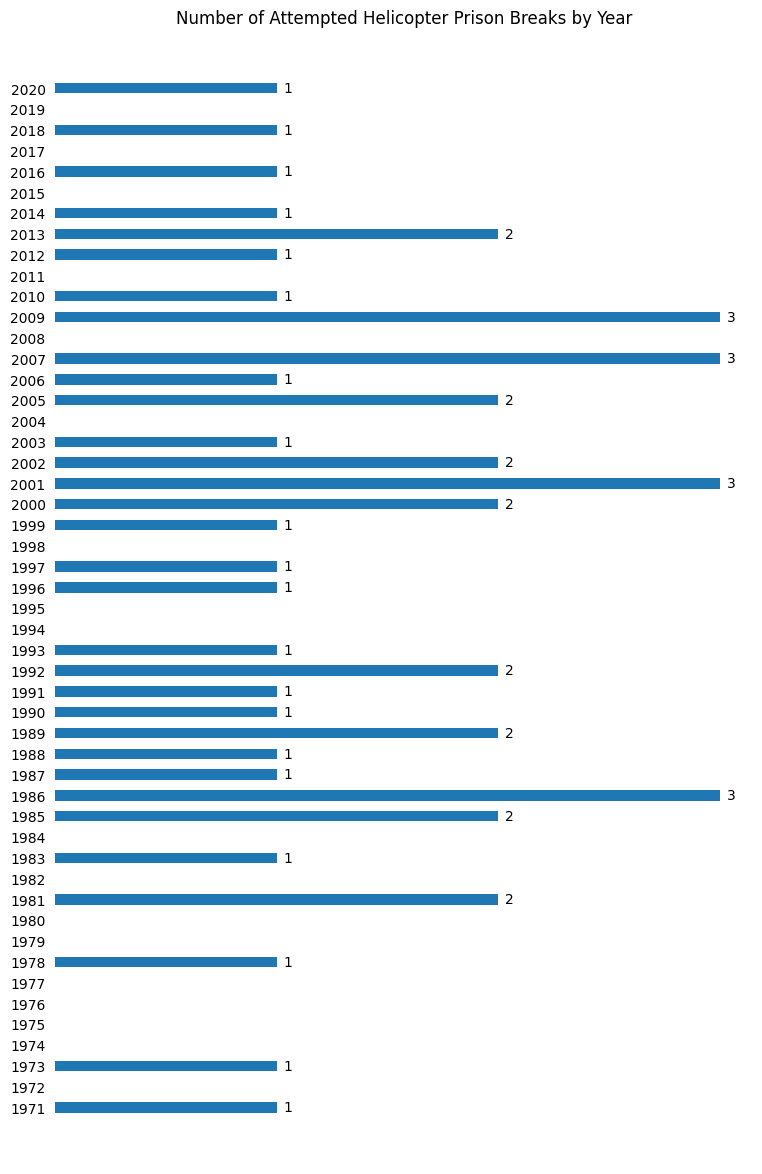

In [14]:
barplott(year_counts) # You can view the details of this function in the last code cell 

From the barplot above, we can see that the most attempts at breaking out of prison with helicopters occured in 1986, 2001, 2007 and 2009.

### 6. Determining Which Country had the Most Number of Attempted Helicopter Prison Breaks

In [15]:
# new_data is the cleaned dataset from step 4
new_data.head()

,Year,Prison name,Country,Succeeded
0,1971,Santa Martha Acatitla,Mexico,Yes
1,1973,Mountjoy Jail,Ireland,Yes
2,1978,"United States Penitentiary, Marion",United States,No
3,1981,"Fleury-Mérogis, Essonne, Ile de France",France,Yes
4,1981,"Orsainville Prison, Quebec City",Canada,No


In [16]:
country_count =new_data.pivot_table(values = "Year", index ="Country", aggfunc ="count")
country_count.sort_values(by = "Year", inplace = True, ascending = False)
country_count.columns = ["Number of Attempts"]
country_count

,Number of Attempts
Country,
France,15
United States,8
Belgium,4
Canada,4
Greece,4
Australia,2
Brazil,2
United Kingdom,2
Chile,1


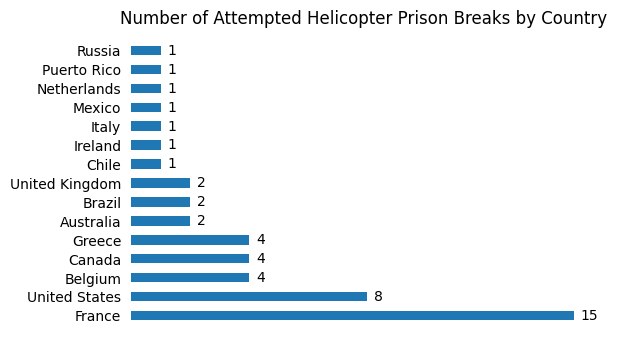

In [18]:
barplott2(country_count) # You can view the details of this function in the last code cell 

The barplot above shows that France had the most attempted helicopter prison breaks (15) between 1971 and 2020. The US had the seond highest number of attempted prison breaks (8), while the rest of the countries had 4 or less attempted helicopter prison breaks in the 50-year period.

### 7.1  Extra - Determining the Percentage of Successful Helicopter Prison Breaks
Note: Successful here means that the escapees were able to leave the prison with the helicopter.

In [19]:
# Counting successful and failed attempts
success_count = new_data.pivot_table(index ="Succeeded", values = "Country", aggfunc = "count")
# Adding column names and sorting
success_count.columns = ["Counts"]
success_count.sort_index(inplace = True, ascending = False)
success_count

,Counts
Succeeded,
Yes,34
No,14


Text(0.5, 1.0, 'Percentages of Successful and Unsuccessful Helicopter Prison Breaks')

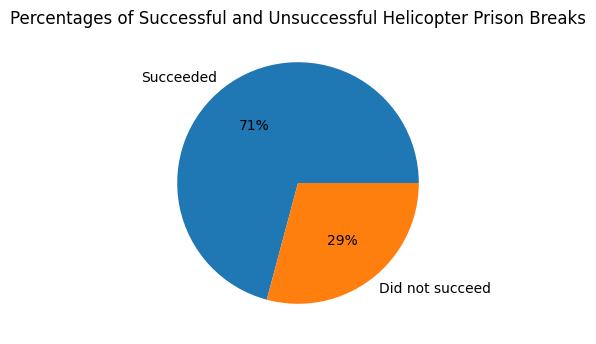

In [20]:
plt.pie(data =success_count, x ="Counts", labels = ("Succeeded", "Did not succeed"), autopct='%1.f%%')
plt.title("Percentages of Successful and Unsuccessful Helicopter Prison Breaks")

As can be seen in the chart above, 71% (34) of the helicopter prison breaks were successful and the prisoners were able to escape with the helicopter, while 29% were unsuccessful. 

### 7. 2 Extra - Determining the Percentage of "Successful" Escapees Who Have Not Been Recaptured

Here, we'll be computing how many of the "successful" prison breaks have been able to avoid recapture so far. 

In [21]:
# Selecting the successful prison breaks
Success =data[data["Succeeded"] == "Yes"]
Successes = Success.copy()
Successes.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
6,"December 19, 1985","Perry Correctional Institution, Pelzer, South ...",United States,Yes,James Rodney LeonardWilliam Douglas BallewJess...,"One murderer, James Rodney Leonard, and two ar..."
7,"December 31, 1985","Cândido Mendes penitentiary, Ilha Grande, Rio ...",Brazil,Yes,"José Carlos dos Reis Encina, a.k.a. ""Escadinha""",Drug lord Encina was rescued by José Carlos Gr...


In [22]:
pd.set_option('display.max_colwidth', None) # This is to remove the column limit so that we can see all the characters in a column


To determine which of the escapees have been able to evade arrest so far, I had to look at the Details column and do some more research online.

[This](https://france3-regions.francetvinfo.fr/provence-alpes-cote-d-azur/2013/11/02/evasion-de-la-prison-de-draguignan-en-2001-un-des-organisateurs-supposes-arrete-350177.html), [this](https://jnews-france.fr/ces-mysteres-qui-entourent-le-caid-toulonnais-franck-perletto-interpelle-la-semaine-derniere/) and [this](https://apnews.com/article/d9df3592a19041822a3c4055f9536505) are some of the news articles I used to confirm whether an escapee had been recaptured or not. 

In [23]:
Successes.reset_index(inplace = True)
# Refer to the Markdown cell above for how I got this data
Successes["Evade Arrest"] = pd.Series(["Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No",  "Yes", "Yes", "No", "No", "No", "Unknown", "No", "No", "No",  "No", "No", "No", "No","No", "No", "No", "No", "No", "No", "No", "No"])
Successes.head(3)

,index,Date,Prison name,Country,Succeeded,Escapee(s),Details,Evade Arrest
0,0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,"Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 1975 action movie Breakout, which starred Charles Bronson and Robert Duvall.[9]",Yes
1,1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a helicopter and forced the pilot to land in the exercise yard of Dublin's Mountjoy Jail's D Wing at 3:40 p.m., October 31, 1973. Three members of the IRA were able to escape: JB O'Hagan, Seamus Twomey and Kevin Mallon. Another prisoner who also was in the prison was quoted as saying, ""One shamefaced screw apologised to the governor and said he thought it was the new Minister for Defence (Paddy Donegan) arriving. I told him it was our Minister of Defence leaving."" The Mountjoy helicopter escape became Republican lore and was immortalized by ""The Helicopter Song"", which contains the lines ""It's up like a bird and over the city. There's three men a'missing I heard the warder say"".[1]",No
2,3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré and Daniel Beaumont, succeed in the first and double helicopter escape of a French prison, in Fleury-Mérogis (Essonne), the best kept prison of France. The men hijacked a helicopter and its pilot that they rented to fly from Paris to Orléans. The pilot, Claude Fourcade, was taken hostage and was told that they were holding his wife and daughter hostage (which was not true) ... The flight turned into Paris - Fleury -Merogis - Porte d'Orléans.[11]",No


In [24]:
# A simple pivot table (similar to value_counts())
evade_count =Successes.pivot_table(values='Date', index='Evade Arrest', aggfunc= "count")
evade_count.columns = ["Counts"]
evade_count

,Counts
Evade Arrest,
No,30
Unknown,1
Yes,3


Text(0.5, 1.0, 'Have the Escapees Been Able to Evade Arrest?')

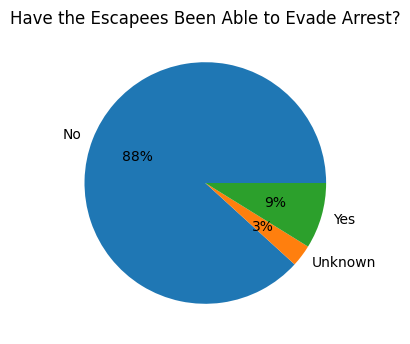

In [25]:
plt.pie(data =evade_count, x ="Counts", labels = ("No", "Unknown", "Yes"), autopct='%1.f%%')
plt.title("Have the Escapees Been Able to Evade Arrest?")

Here, we can see that the escapees in 88% (or 30) of the prison breaks have been recaptured, while 9% (3) have not been arrested. It is **important** to note that of the 3 escapees who haven't been arrested, 1 was a political prisoner, and the charges have been dropped. The whereabouts of another one is known, but the authorities have shown no interest in extraditing him. Thus, **only one** of three escapees is in hiding. His name is Vassilis Palaiokostas, and he escaped from from Athens' Korydallos Prison in 2009. 

The status of one of the three escapees in the 2001 Draguignan prison break in France, Abdelhamid Carnous, is unknown.

### 8. Conclusion
This project analysed the data of helicopter prison escapes from 1971-2020. It was found that out of a total of 48 attempted helicopter prison escapes, 34 were successful. However, 88% (30) of the "successful" escapes were recaptured. France had the highest number of helicopter prison breaks (15), while the US had the second highest number (8).  1986, 2001, 2007 and 2009 were the years with the highest incidents of helicopter escapes (3).

In [2]:
# These are the codes for the barplot functions. 

def barplott(pivot_table_with_1_column):
    data = pivot_table_with_1_column
    ya = data.index
    d = {ya[n]:int(data.loc[ya[n]]) for n in range(0,len(data))}
    plt.figure(figsize=(9,15))

    axes = plt.axes()
    axes.get_xaxis().set_visible(False)

    spines = axes.spines
    spines['top'].set_visible(False)
    spines['right'].set_visible(False)
    spines['bottom'].set_visible(False)
    spines['left'].set_visible(False)
    ax = plt.barh(*zip(*d.items()), height=.5)
    plt.yticks(list(d.keys()), list(d.keys()))
    plt.xticks(range(4), range(4))
    rectangles = ax.patches
    for rectangle in rectangles:
        x_value = rectangle.get_width()
        y_value = rectangle.get_y() + rectangle.get_height() / 2
        space = 5
        ha = 'left'
        label = "{}".format(x_value)
        if x_value > 0:
            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha)

    axes.tick_params(tick1On=False)
    plt.title("Number of Attempted Helicopter Prison Breaks by Year")
    plt.show()
    
    
    
def barplott2(pivot_table_with_1_column):
    data = pivot_table_with_1_column
    ya = data.index
    d = {ya[n]:int(data.loc[ya[n]]) for n in range(0,len(data))}
    plt.figure(figsize=(6,4))
    axes = plt.axes()
    axes.get_xaxis().set_visible(False)

    spines = axes.spines
    spines['top'].set_visible(False)
    spines['right'].set_visible(False)
    spines['bottom'].set_visible(False)
    spines['left'].set_visible(False)
    ax = plt.barh(*zip(*d.items()), height=.5)
    plt.yticks(list(d.keys()), list(d.keys()))
    plt.xticks(range(4), range(4))
    rectangles = ax.patches
    plt.title("Number of Attempted Helicopter Prison Breaks by Country")
    for rectangle in rectangles:
        x_value = rectangle.get_width()
        y_value = rectangle.get_y() + rectangle.get_height() / 2
        space = 5
        ha = 'left'
        label = "{}".format(x_value)
        if x_value > 0:
            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha)

    axes.tick_params(tick1On=False)
    plt.show()